<a href="https://colab.research.google.com/github/CompPsychology/psych290_colab_public/blob/main/notebooks/week-02/W2_Tutorial_03_DLATK_intro_1gramExtraction_(dla_tutorial).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# W2 Tutorial 3 -- DLATK feature tables, 1gram feature extraction (DB: dla_tutorial) (2025-03)

(c) Johannes Eichstaedt & the World Well-Being Project, 2023.

✋🏻✋🏻 NOTE - You need to create a copy of this notebook before you work through it. Click on "Save a copy in Drive" option in the File menu, and safe it to your Google Drive.

✉️🐞 If you find a bug/something doesn't work, please slack us a screenshot, or email johannes.courses@gmail.com.

## 1) Setting up Colab with DLATK and SQLite

We begin by setting up the Colab environment. The next couple of subsections do this for you.

This will take ~1.5 to 2 minutes. If colab asks you about this not being authored by Google, say "Run anyway."

### 1a to 1c) Streamlined: Setting up Colab with DLATK and your data

In [1]:
# assigning the corpus database name
database_name = "tutorial_3"

########### 1a) Install

# installing DLATK and necessary packages
!git clone -b psych290 https://github.com/dlatk/dlatk.git
!pip install -r dlatk/install/requirements.txt
!pip install dlatk/
!pip install wordcloud langid jupysql

########### 1b) Download data and insert into SQLite database

# this download the csvs we need for this tutorial
!git clone https://github.com/CompPsychology/psych290_data.git

# load the required package -- similar to library() function in R
import os
from dlatk.tools.importmethods import csvToSQLite

# store the complete path to the database -- sqlite_data/[database_name].db
database = os.path.join("sqlite_data", database_name)

msgs = "psych290_data/dla_tutorial/msgs.csv"
csvToSQLite(msgs, database, "msgs")

outcomes = "psych290_data/dla_tutorial/blog_outcomes.csv"
csvToSQLite(outcomes, database, "outcomes")

############# 1c) Setup database connection

# loads the %%sql extension
%load_ext sql

# connects the extension to the database
from sqlalchemy import create_engine
engine = create_engine(f"sqlite:///sqlite_data/{database_name}.db?charset=utf8mb4")
%sql engine

#set the output limit to 50
%config SqlMagic.displaylimit = 50

## PRINT FINISHED
print(" ******* LOAD FINISHED ¯\_(ツ)_/ *******")

Cloning into 'dlatk'...
remote: Enumerating objects: 6991, done.
remote: Counting objects: 100% (1084/1084), done.
remote: Compressing objects: 100% (158/158), done.
remote: Total 6991 (delta 999), reused 933 (delta 926), pack-reused 5907 (from 2)
Receiving objects: 100% (6991/6991), 62.39 MiB | 14.60 MiB/s, done.
Resolving deltas: 100% (4941/4941), done.
Updating files: 100% (338/338), done.
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 71.7 MB/s eta 0:00:00
  Created wheel for image: filename=image-1.5.33-py2.py3-none-any.whl size=19482 sha256=346f4aae789884c124518d25c5482b8441f39f33836597a1859c8e633e162291
  Stored in dir

SQL Query: CREATE TABLE msgs (message_id INT, user_id INT, date VARCHAR(31), created_time VARCHAR(31), message LONGTEXT);


Importing data, reading psych290_data/dla_tutorial/msgs.csv file
Reading 10000 rows into the table...
Reading 10000 rows into the table...
Reading 10000 rows into the table...
Reading remaining 1674 rows into the table...
Importing data, reading psych290_data/dla_tutorial/blog_outcomes.csv file
Reading remaining 1000 rows into the table...


SQL Query: CREATE TABLE outcomes (user_id INT, gender INT, age INT, occu VARCHAR(31), sign VARCHAR(15), is_indunk INT, is_student VARCHAR(7), is_education VARCHAR(7), is_technology VARCHAR(7));


 ******* LOAD FINISHED ¯\_(ツ)_/ *******


Now we have set up the infrastructure and loaded the necessary data into the tables! 🥳

In [ ]:
%sqlcmd tables

Name
msgs
outcomes


## 2) Date your data 💃🏻🕺🏻 / 💃🏻💃🏻 / 🕺🏻🕺🏻

To begin with, let's check what the columns are inside the `outcomes` and the `msgs` table. The `PRAGMA` statement with the `table_info` function helps us do this. `PRAGMA` statements are used to query the SQLite library for internal (non-table) data

**NOTE:** In 🐬🐬🐬 MySQL, we can do this with the 🐬🐬🐬 `DESCRIBE [TABLE_NAME]` command.

In [ ]:
%sql PRAGMA table_info(outcomes)

Running query in 'sqlite:///sqlite_data/tutorial_3.db?charset=utf8mb4'

cid,name,type,notnull,dflt_value,pk
0,user_id,INT,0,None,0
1,gender,INT,0,None,0
2,age,INT,0,None,0
3,occu,VARCHAR(31),0,None,0
4,sign,VARCHAR(15),0,None,0
5,is_indunk,INT,0,None,0
6,is_student,VARCHAR(7),0,None,0
7,is_education,VARCHAR(7),0,None,0
8,is_technology,VARCHAR(7),0,None,0


And here is a version that looks a little cleaner with a teaspoon of Python:

In [ ]:
result = %sql PRAGMA table_info(outcomes)
print(result)

Running query in 'sqlite:///sqlite_data/tutorial_3.db?charset=utf8mb4'

+-----+---------------+-------------+---------+------------+----+
| cid |      name     |     type    | notnull | dflt_value | pk |
+-----+---------------+-------------+---------+------------+----+
|  0  |    user_id    |     INT     |    0    |    None    | 0  |
|  1  |     gender    |     INT     |    0    |    None    | 0  |
|  2  |      age      |     INT     |    0    |    None    | 0  |
|  3  |      occu     | VARCHAR(31) |    0    |    None    | 0  |
|  4  |      sign     | VARCHAR(15) |    0    |    None    | 0  |
|  5  |   is_indunk   |     INT     |    0    |    None    | 0  |
|  6  |   is_student  |  VARCHAR(7) |    0    |    None    | 0  |
|  7  |  is_education |  VARCHAR(7) |    0    |    None    | 0  |
|  8  | is_technology |  VARCHAR(7) |    0    |    None    | 0  |
+-----+---------------+-------------+---------+------------+----+


In [ ]:
result = %sql PRAGMA table_info(msgs)
print(result)

Running query in 'sqlite:///sqlite_data/tutorial_3.db?charset=utf8mb4'

+-----+--------------+-------------+---------+------------+----+
| cid |     name     |     type    | notnull | dflt_value | pk |
+-----+--------------+-------------+---------+------------+----+
|  0  |  message_id  |     INT     |    0    |    None    | 0  |
|  1  |   user_id    |     INT     |    0    |    None    | 0  |
|  2  |     date     | VARCHAR(31) |    0    |    None    | 0  |
|  3  | created_time | VARCHAR(31) |    0    |    None    | 0  |
|  4  |   message    |   LONGTEXT  |    0    |    None    | 0  |
+-----+--------------+-------------+---------+------------+----+


#### 👩‍🔬💻 Exercise

Looking at the table which column ties both tables together (the key -- foreign key relationship)? Here, it's named the same across both the tables, which is always recommended.

### 2a) The message table

Now, let's make sure we see the `msgs` table in the way that we expect by listing the first few rows. `msgs` table is the "message table" in which DLATK expects its messages.

<!-- **NOTE:** Make sure to enable scrollable outputs in **Cell -> All Output -> Toggle Scrolling**. Scroll bars appear on the side of output cells, and long output will not clog your screen, and thus, your sanity will be maintained (for at least a little longer). -->

In [ ]:
%%sql

SELECT *
FROM msgs
ORDER BY RANDOM()
LIMIT 3 ;

Running query in 'sqlite:///sqlite_data/tutorial_3.db?charset=utf8mb4'

message_id,user_id,date,created_time,message
19131,317581,"21,February,2004",2004-02-21 00:00:00,"updates My Step sister is doing better. She's been doing some talking and can remember all her children except the one that was born 4 days before her first stroke. She remembers her husband but not the fact that he has been to visit her. Did I mention that I'm back on the market? Well, I guess I am. So, lookout! Peace-"
29304,3901750,"31,July,2004",2004-07-31 00:00:00,"well yesterday i woke up and watched grind for like the 5th or 6th time. whoo! suprise suprise...lol i pretty much did nuthin durin the day. talked 2 shaina some bout it. that nite us and the furgrams went out to rivergate. cody didnt bc he was at kortnies. my daddy needed to get my mom somethin 4 her burthday so me my mama, bobbi, and brody split up from charlie and daddy. we stayed in teh pets store for like a half hour! i love dogs. i jus wanna take em all home!!! we went into claires and looked at all the jewelry and stuff. i wanted this belt the same one they have in hot topic but cheaper! i didnt get it tho. ill wait. ill get my grandma to get it 4 me. *he he* my mom saw these sox that she wanted they had lil basketballs on the top of them. they were cute. and she saw these earrings that she wanted they were lil flip flop shoes earings. bobbi bought them 4 my mama (shhh she doesnt noe yet. its 4 her burthday) we went and ate after that. i had chinese...mmmmmm! i went to hot topic after that. MY FAVORITE STORE EVER!! WHOO! i got a new cuff bracelet, some happy bunny paper, and a pen. we came home after that and i watched grind for the 3rd time that day. like the 8th time ive seen it period in like 4 or 5 days. wat can i say.....its my favorite movie! well not much else to say. bye bye"
1031,1234212,"07,April,2003",2003-04-07 00:00:00,Hey folks I am writing from my laptop in the living room. How? You may ask. Well I got my data cable and new phone yesterday...and let me tell you it is the bomb diggity to be able to walk around a surf the web. It clocks in at 115Kbps here at the house...and can connect at up to 160Kbps...so wooohooo! I will be taking this to the mall on Sunday to update from there...this is sooo kewl!


You can observe that the users in the `msgs` table, identified by their `user_id`s, have written `message`s, which are uniquely identified by `message_id`s.

**NOTE:** `RANDOM()` is replaced with 🐬🐬🐬 `RAND()` in MySQL.
<br/>

⚠️ DLATK message tables can have whatever name you want, but they **NEED** to have a `message` and a `message_id` column.


#### The most important question first, always: How many messages are there?

In [ ]:
%%sql

SELECT COUNT(*)
FROM msgs;

Running query in 'sqlite:///sqlite_data/tutorial_3.db?charset=utf8mb4'

COUNT(*)
31674


~32k messages -- Not a trivial size!

#### How are they distributed across users?

Have users written multiple blog posts? Let's check using **COUNT** and **GROUP BY** (this should be familiar by now).

In [ ]:
%%sql

SELECT user_id, COUNT(*) AS blog_count
FROM msgs
GROUP BY user_id
ORDER BY blog_count DESC
LIMIT 5;

Running query in 'sqlite:///sqlite_data/tutorial_3.db?charset=utf8mb4'

user_id,blog_count
942828,2068
3523319,1052
1234212,643
317581,619
664485,566


Looks like at least some users have written a lot of blog posts!!

But, is that true for all users? Let's flip the sort order.

In [ ]:
%%sql

SELECT user_id, COUNT(*) AS blog_count
FROM msgs
GROUP BY user_id
ORDER BY blog_count ASC
LIMIT 5;

Running query in 'sqlite:///sqlite_data/tutorial_3.db?charset=utf8mb4'

user_id,blog_count
1305545,1
2568090,1
2959033,1
3363036,1
3367343,1


Clearly not.

So we have users here who have written 1000+ blog posts, and other who have written just 1. Good to know!

#### 👩‍🔬💻 Exercise:

Can you find the mean number of blogs per user?

**HINT:** use nested queries, or make yourself an intermediate table.

#### 👩‍🔬💻 Exercise:

Can you find the number of users with a single blog post?

**HINT:** Think of the `HAVING` clause, and you might also need one subquery here, or make yourself an intermediate table.

### 2b) Outcome Table

Similarly, let's see what do we have inside the `blog_outcomes` table.

In [ ]:
%%sql

SELECT *
FROM outcomes
LIMIT 5;

Running query in 'sqlite:///sqlite_data/tutorial_3.db?charset=utf8mb4'

user_id,gender,age,occu,sign,is_indunk,is_student,is_education,is_technology
3991108,1,17,indUnk,Leo,1,NA,NA,NA
3417138,1,25,Communications-Media,Taurus,0,0,NA,NA
3673414,0,14,Student,Scorpio,0,1,NA,NA
3361075,1,16,Student,Capricorn,0,1,NA,NA
4115327,1,14,indUnk,Libra,1,NA,NA,NA


#### 👩‍🔬💻 Exercise

Find the number of male and female users.

Let's check if the numbers of unique users in both the tables are same, for completeness of this analysis.

Since we know that `user_id` is the primary key of the `blog_outcomes` table, we just need to count the number of rows. Primary key means that every entry in it is distinct (and in this particular case, there can be no `NULL`s).

In [ ]:
%%sql

SELECT COUNT(*)
FROM outcomes;

Running query in 'sqlite:///sqlite_data/tutorial_3.db?charset=utf8mb4'

COUNT(*)
1000


In [ ]:
%%sql

SELECT COUNT(DISTINCT(user_id))
FROM msgs;

Running query in 'sqlite:///sqlite_data/tutorial_3.db?charset=utf8mb4'

COUNT(DISTINCT(user_id))
1000


Data integrity check: ✅

#### 👩‍🔬💻 Exercise

Can you do this properly? Without making willy nilly assumptions?

i.e., check how many *matching* user ids are in the two tables?

Looks like they match. Great! This concludes a brief exploration of the data.

We saw that the `blog_outcomes` table contains the details of users (you will realize soon why it's named as "outcomes"). And `msgs` table contains the text "corpus" -- the blog posts of the users from the other table.

Super. Let's keep swimming.

We've done all this because it's always a good idea to get a sense of the dimensionality of your dataset before you do anything with it.

## 3) DLATK: Let's extract 1grams (=tokens) from the blogs!

**Quick reminder/infobox: calling DLATK**

You will be using the DLATK infrastructure code.

You will start every DLATK command with `!dlatkInterface.py`. As the name suggests, this is an interface to a much larger set of code called DLATK. The .py tells you that this is a Python file.

The `!` makes it the same as running from the command line. Even though this notebook runs with Python in the background, and DLATK is written in Python, somewhat comically, we are actually running DLATK from the command line, just like we would `!ls` to list files on the shell (see the shell/bash tutorial).

So if you wanted Colab to show files on the command line, you would say:

In [ ]:
!ls

dlatk	      msgs404u.csv   sample_data  users100.csv
msgs100u.csv  psych290_data  sqlite_data  users404.csv


so if you run `!dlatkInterface.py`, the way we have set up the server actually tells the Linux system under the hood (the shell) to run `python3 (some folder)/dlatkInterface.py` -- so the Python script will run. If you don't give it parameters, it will just tell you about all the parameters *you could have* given it to do things.

<!-- Note: good to have scrolling output on for this (Cell > All Output > Toggle Scrolling). -->

In [ ]:
!dlatkInterface.py

Those are a lot of options -- but don't worry, you won't have to know even 10% of them. DLATK can do A LOT.

**Generate 1gram Features**  

The following DLATK command goes through the messages in the corpus table (`--corptable`) in the `tutorial_3` database.

⚠️ **DLATK  expects that a message table has a column called `message` and a column called `message_id` (it does).**

The `--add_ngrams -n 1` part of the command tells it to break up every message into tokens (1grams), using a modern tokenizer.

**The correl field is the group-by field**.

The `--correl_field user_id` might not be obvious on first sight. It's short for `correlation field` -- from a time when DLATK was mostly used to create language correlations. Basically, DLATK will output not just the count of tokens, but also the relative frequency with which _a given unit of a analysis_ used a given token (e.g., for user X, 5% of her tokens are the word "the").

With the `--correl_field` we are picking our _language unit of analysis_. By picking `--correl_field user_id`, we get these language statistics for `user_id`s .

It will output relative frequencies for these units -- what % of words for a given user are this token or that token. This normalizes differences in the amount of language we have from users. We will see this below in more detail when we look at the output tables that are being produced (called `feature tables`).

Importantly, if a user has multiple blog posts, it will aggregate them all together -- be it 1 blog or 1000.

It makes the most sense to think of it as the "group by" field, or **group field**.

Btw, if feature tables with the same name exists, DLATK will delete / flush them. So if you ever abort a DLATK run, and then restart it, it will simply drop the partial output you may have had there before.

Alright, let's run the feature extraction. This will take some time. Note:

* the black little circle next to Python 3 in the top right corner :: it tells you that Python is working under the hood.
* the `*` in the cell below once you execute tell you that the current input cell is active.

DLATK will give you an update for every 5k messages it has read and processed.

⚠️ you should always have an index on the `--correl_field` (so `user_id`). We took care of it in the top. Just don't forget you need this when the time comes that you run your own data in in your own message tables.

In [ ]:
!dlatkInterface.py \
  --corpdb {database_name} \
  --corptable msgs \
  --correl_field user_id \
  --add_ngrams -n 1



TopicExtractor: gensim Mallet wrapper unavailable, using Mallet directly.

-----
DLATK Interface Initiated: 2025-04-09 22:53:03
-----
Connecting to SQLite database: /content/sqlite_data/tutorial_3
query: PRAGMA table_info(msgs)
SQL Query: DROP TABLE IF EXISTS feat$1gram$msgs$user_id
SQL Query: CREATE TABLE feat$1gram$msgs$user_id ( id INTEGER PRIMARY KEY, group_id INTEGER, feat VARCHAR(36), value INTEGER, group_norm DOUBLE)


Creating index correl_field on table:feat$1gram$msgs$user_id, column:group_id 


SQL Query: CREATE INDEX correl_field$1gram$msgs$user_id ON feat$1gram$msgs$user_id (group_id)


Creating index feature on table:feat$1gram$msgs$user_id, column:feat 


SQL Query: CREATE INDEX feature$1gram$msgs$user_id ON feat$1gram$msgs$user_id (feat)
query: PRAGMA table_info(msgs)
SQL Query: DROP TABLE IF EXISTS feat$meta_1gram$msgs$user_id
SQL Query: CREATE TABLE feat$meta_1gram$msgs$user_id ( id INTEGER PRIMARY KEY, group_id INTEGER, feat VARCHAR(16), value INTEGER, group_norm D

You know from dating your data that there are 30k messages, and you are getting and update every 5k, so you can tell this will take a hot sec. By which we mean about 2min.

At the bottom of the output it should say

`DLATK exits with success! A good day indeed  ¯\_(ツ)_/¯.`

Very good! we've run our first DLATK query. The last thing it did was to activate the indices on all the columns.

So what did just happen?

### 3a) What's in a feature table? And in its name?

We already see the new feature table name in the output above (`feat$1gram$msgs$user_id`), but let's look in the database itself what has showed up.

In [ ]:
%sqlcmd tables

Name
feat$1gram$msgs$user_id
feat$meta_1gram$msgs$user_id
msgs
outcomes


We are getting a formatting error here, because these tables contain the \$ dollar sign.

Let's use a TINY amount of Python to fix this. Lets try printing another way. We can capture the output of `%sql <command>` and call `print` function over it. This is a Python function we don't worry about for now. We are basically doing `result <- someStuff` and `print(result)` in R speak. Also, note that it's exactly what we do with the `username`s in the first cell of the notebooks.

In [ ]:
result = %sqlcmd tables
print(result)

+------------------------------+
|             Name             |
+------------------------------+
|   feat$1gram$msgs$user_id    |
| feat$meta_1gram$msgs$user_id |
|             msgs             |
|           outcomes           |
+------------------------------+


As you can see, we've gotten the 1gram table the meta_1gram table, which always get auto-created alongside the 1gram extraction (very nifty!). The next tutorial let's you explore that.

### 3b) Feature table names

Feature tables take a moment to get used to -- see its naming (here) and column conventions (below). It's perhaps _THE KEY THING_ to understand about DLATK.

The feature table that was produced here is `feat$1gram$msgs$user_id`

* `feat` <- this is a feature table (the result of `--add_ngrams`)

* `1gram` <- with 1grams in it (single tokens) (the result of `-n 1`)

* `msgs` <- from the message table `msgs` (the result of `--corptable msgs`)

* `user_id` <- extracted and aggregated for the unit of analysis identified by user_id (the result of `--correl_field user_id`)

Alright, that explains the table name, let's look at what's in it.

So basically our extraction command looked at the message table, and extracted word counts for all users. It did not yet consider in anyway the `blog_outcomes` table.

In [ ]:
result = %sql PRAGMA table_info(feat$1gram$msgs$user_id)
print(result)

Running query in 'sqlite:///sqlite_data/tutorial_3.db?charset=utf8mb4'

+-----+------------+-------------+---------+------------+----+
| cid |    name    |     type    | notnull | dflt_value | pk |
+-----+------------+-------------+---------+------------+----+
|  0  |     id     |   INTEGER   |    0    |    None    | 1  |
|  1  |  group_id  |   INTEGER   |    0    |    None    | 0  |
|  2  |    feat    | VARCHAR(36) |    0    |    None    | 0  |
|  3  |   value    |   INTEGER   |    0    |    None    | 0  |
|  4  | group_norm |    DOUBLE   |    0    |    None    | 0  |
+-----+------------+-------------+---------+------------+----+


### 3c) Feature table column names

Feature tables are the backbone of DLATK which only deals with **4 kinds of tables (message tables, outcome tables, feature tables, and "lexicon" tables)**. Lexicon tables and message tables have prescribed formats but always contain the same thing. Outcome tables are basically just your garden variety spreadsheets with outcome variables.  

**Only the feature tables are a generic data structure.** They can hold 1grams, 1to3grams, part-of-speech, lexicons, topics, embeddings...

# ⚠️

Feature tables created by DLATK will have **different table names** encoding how they were created.

# ⚠️

BUT all feature tables have exactly the **same column names**. That's part of the beauty of how DLATK works. They are:

* `id`: automatically created index of a sql table row, ignore this
* `group_id`: which field/group was aggregated to. here: user ids from the message table `msgs`
* `feat`: features -- the specific 1grams / tokens. here: 1grams.
* `value`: the number of times the feature (here: 1gram) occurred within the group (here: user_id)
* `group_norm`: `value` divided by the total number of features for this group (hre: user_id) **this is the key output field of the table**

#### How the feature table name connects to its contents

This is an infinitely important thing to understand in this course. Please ask if it doesn't click. Many things downstream won't make sense without understanding this at least "OK for now."

Here is the name of the table again: `feat$1gram$msgs$user_id`

| this column in the feature table... | ...contains this (as recorded in table name)|
|------|------|
| feat | 1gram |
| group_id | user_id |

Let's just repeat this again below, you can read along the arrows to make this mapping more clear.

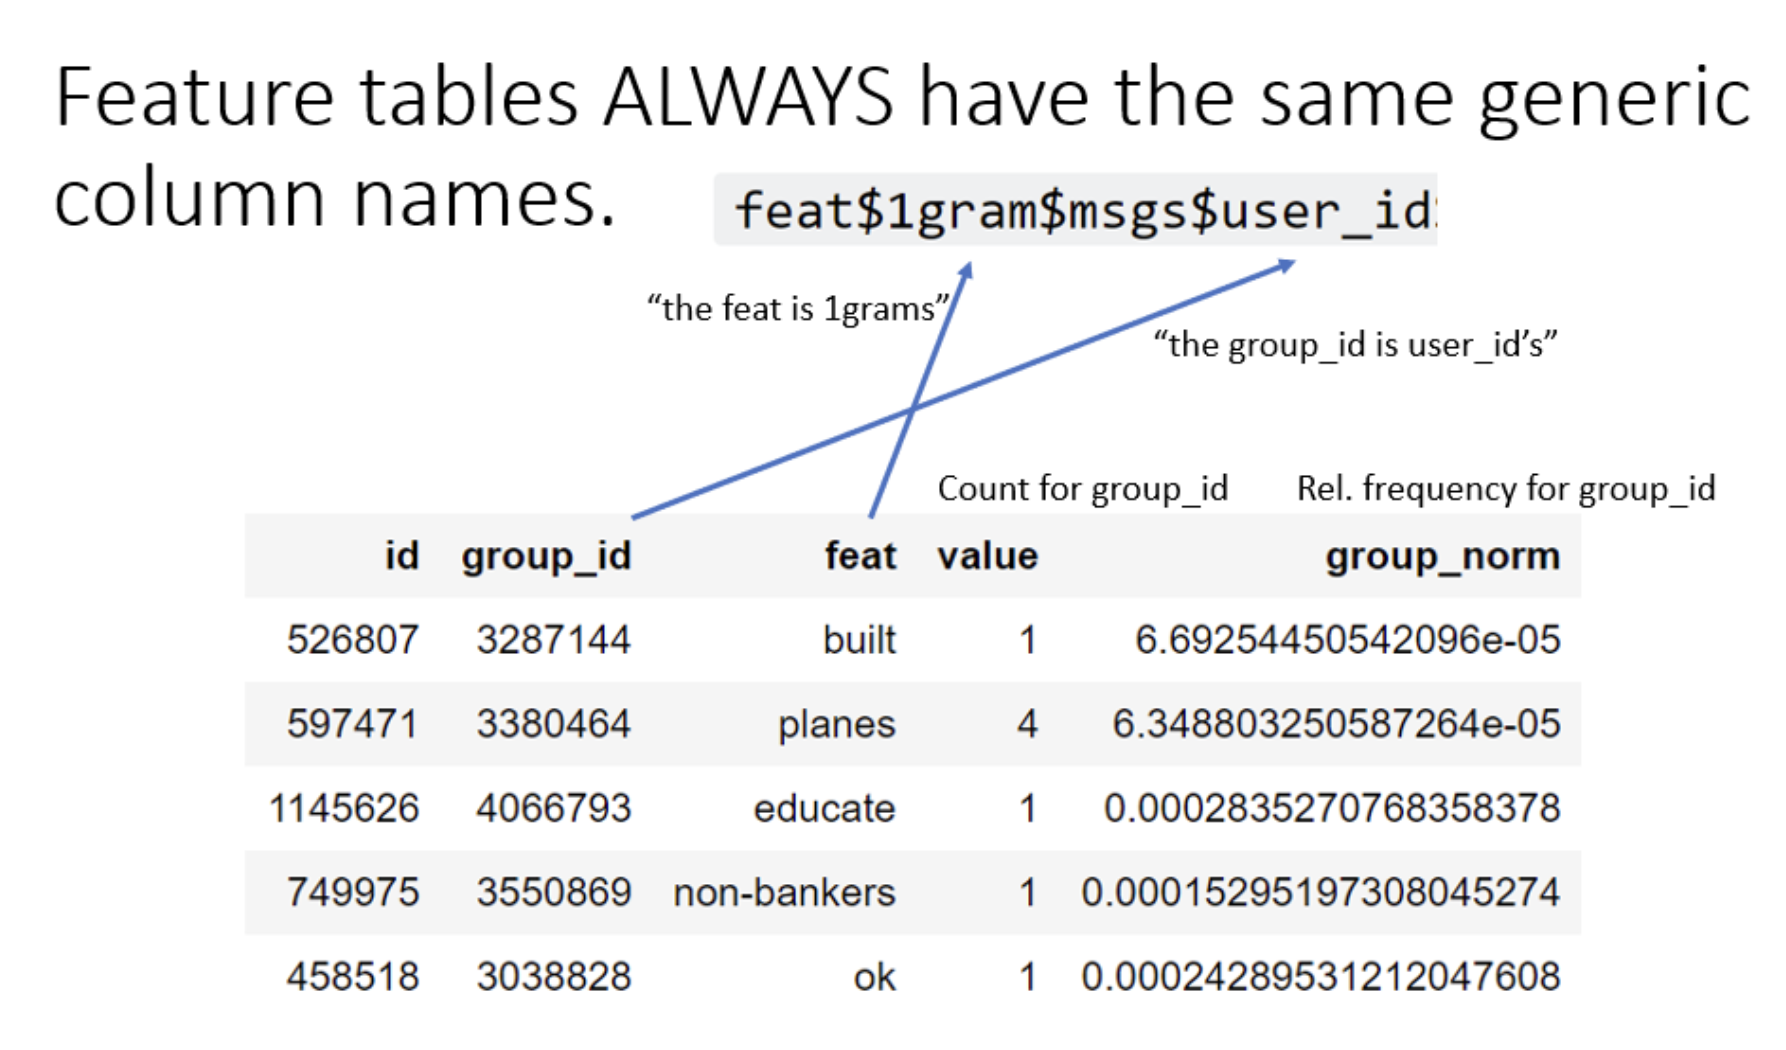

Look at some random samples from this feature table in the command below, below. Run this multiple times to see different samples.

Please convince yourself that the `feat` column stores `1gram`s, and the `group_id` stores `user_id`s.

This is the key thing to understand about how feature tables work. Later we'll have group_ids that are dates or counties, features that are dictionary scores or something else. Feature tables are a nifty generic data structure that we need to wrap our head around. So please wrap away!

In [ ]:
%%sql

SELECT *
FROM feat$1gram$msgs$user_id
ORDER BY RANDOM()
LIMIT 5;

Running query in 'sqlite:///sqlite_data/tutorial_3.db?charset=utf8mb4'

id,group_id,feat,value,group_norm
1193768,4163734,actually,3,0.0008203445447087777
484283,3146933,monday,3,0.00031308703819661864
635253,3415194,screams,1,0.0009737098344693282
52760,671748,reap,1,2.0848100738022766e-05
557159,3327285,choice,1,0.00014194464158978


BTW, careful when reading the output! when it says `7.959882193743533e-05` it's a computer way of saying it's `7.95 * 10(-5) = 0.0000795`. A very small number.

### 3d) Let's work with feature frequencies and group_norms

Let's check the number of words in our dataset.

In [ ]:
%%sql

SELECT SUM(value)
FROM feat$1gram$msgs$user_id;

Running query in 'sqlite:///sqlite_data/tutorial_3.db?charset=utf8mb4'

SUM(value)
7764052


~7.8 million! So we probably won't be going back to excel with this.

Since the `group_norm` column contains the normalized frequency of the features in a group, let's check if it actually sums to 1 for each group -- in this case, that means that all the relative word counts for users add up to 100%

In [ ]:
%%sql

SELECT group_id, SUM(group_norm)
FROM feat$1gram$msgs$user_id
GROUP BY group_id
LIMIT 5;

Running query in 'sqlite:///sqlite_data/tutorial_3.db?charset=utf8mb4'

group_id,SUM(group_norm)
28451,0.9999999999999939
174357,1.0000000000000029
216833,0.9999999999998973
317581,0.9999999999999795
446275,0.9999999999999789


the numbers with all the 9's in the 0.9999... are 1's, up to "machine precision." Basically, they computer only keeps 10 or so significant digits. Round up in your head. You get the idea.

Let's see how many different (distinct) tokens appear in the blogs -- number of **types** of token (from the Intro to Linguistics lecture).

In [ ]:
%%sql

SELECT COUNT(DISTINCT(feat))
FROM feat$1gram$msgs$user_id;

Running query in 'sqlite:///sqlite_data/tutorial_3.db?charset=utf8mb4'

COUNT(DISTINCT(feat))
137687


Whoa!! That's a lot -- 138,000 TYPES (distinct tokens). A normal vocabulary is 10k-20k. We might have to filter out the really rare ones later.

From the above sentence, using your thinking, how often does the vast majority of types occur? What's the median number of tokens per type?

#### 👩‍🔬💻 Exercise

Can you find the most frequent feature, and also the least frequent (there can be many of course, as the minimum frequency to show up in the table is 1)?

Ok, enough guessing. How many types occur exactly once (1 token) in the whole dataset?

In [ ]:
%%sql

SELECT COUNT(*)
FROM (SELECT SUM(value) AS tokens_per_type
      FROM feat$1gram$msgs$user_id
      GROUP BY feat
      HAVING tokens_per_type = 1) AS a;

Running query in 'sqlite:///sqlite_data/tutorial_3.db?charset=utf8mb4'

COUNT(*)
71563


So to unpack that -- the inner query returns a row for every type that has tokens_per_type = 1, the outer query counts its rows.

So there are 71,563 types that occur exactly 1 time in the data set. Let's see what great beauties are hidden in the long tail of the language distribution.

In [ ]:
%%sql

SELECT *
FROM (SELECT feat, SUM(value) AS tokens_per_type
      FROM feat$1gram$msgs$user_id
      GROUP BY feat
      HAVING tokens_per_type = 1) AS a
ORDER BY RANDOM()
LIMIT 10;

Running query in 'sqlite:///sqlite_data/tutorial_3.db?charset=utf8mb4'

feat,tokens_per_type
you--in,1
photo-album,1
wheelock,1
10-16,1
jo's,1
6-piece,1
howspread,1
sooper-dooper,1
6.65,1
web-log,1


As you can see, some normal words are rarer than you thought (that's always true), some words are nonsense, other languages, contractions between words, and whatnot.

Let's check the word `love` for it's frequency (both absolute and then in terms of average relative frequency).

Absolute count across dataset:

In [ ]:
%%sql

SELECT SUM(value)
FROM feat$1gram$msgs$user_id
WHERE feat = "love";

Running query in 'sqlite:///sqlite_data/tutorial_3.db?charset=utf8mb4'

SUM(value)
9346


By how many users? (if a group_norm for love is included for a user -- she has said love at least once)

In [ ]:
%%sql

SELECT feat, COUNT(group_norm)
FROM feat$1gram$msgs$user_id
WHERE feat = "love"

Running query in 'sqlite:///sqlite_data/tutorial_3.db?charset=utf8mb4'

feat,COUNT(group_norm)
love,738


So "love" has been mentioned a total of ~9,000 times by 738 out of 1,000 users. Love is almost a function word!

Average relative use:

So the **DUMB** way to try to get the average group_norm's is to average group_norms.

In [ ]:
%%sql

-- THIS IS DUMB -- DON'T DO THIS unless you really want to / are confident that ~all groups have used the word. ;
SELECT feat, AVG(group_norm)
FROM feat$1gram$msgs$user_id
WHERE feat = "love"

Running query in 'sqlite:///sqlite_data/tutorial_3.db?charset=utf8mb4'

feat,AVG(group_norm)
love,0.0020341042627666215


This  query tell us that **AMONG THOSE N = 738 WHO HAVE MENTIONED IT**, it makes up 0.2% of words these users have used, on average. So one in 500.

That's of course not what we wanted. The problem with this is that for users who have not mentioned `love`, the table does not contain group_norms -- those "group_norm = 0" rows are not included in the table (it's a sparse table -- the table would blow up otherwise with all the words people did *not* say). How would SQL know to include them in the average?

Well, you compute the average differently, by forcing the right denominator (bottom of fraction).

In [ ]:
%%sql

SELECT COUNT(DISTINCT(group_id))
FROM feat$1gram$msgs$user_id;
-- we have this many users

Running query in 'sqlite:///sqlite_data/tutorial_3.db?charset=utf8mb4'

COUNT(DISTINCT(group_id))
1000


We have 1,000 users.

---


⚠️ **Important note** ⚠️ when doing division in SQLite, **always multiply the numerator and denominator by `1.0`** to ensure proper data type casting. This is just a SQLite quirk! (🐬🐬🐬 MySQL handles this automatically!)

```
SELECT ((numerator * 1.0) / (denominator * 1.0))
FROM table;
```


---



In [ ]:
%%sql

SELECT feat, (SUM(group_norm) * 1.0) / (1000 * 1.0)
FROM feat$1gram$msgs$user_id
WHERE feat = "love";

Running query in 'sqlite:///sqlite_data/tutorial_3.db?charset=utf8mb4'

feat,(SUM(group_norm) * 1.0) / (1000 * 1.0)
love,0.0015011689459217667


This does the trick -- convince yourself that the math is right. Take a moment to think this through.

An average is the sum of something for every person divided by the number of persons.

You sum the group_norms for those who do have it, you assume 0 for those who don't (doesn't change the top of the fraction).
You divide by the total number of users (which you've figured out before). Voila, average group_norms across 0 and non-0 users.

Note that this number is about 25% lower than the dumb average (makes sense, as the dumb average was missing 25% of the sample). So 0.15% is the average relative frequency across users. One in 670ish words. Or one `love` every 20 sentences (roughly 15 words per sentence, ballpark).

#### 👩‍🔬💻 Exercise

Alright, what's the relative frequency with which users mentioned `backpack`?
- first take a guess. It might help to guess "one word in X", and then flip the fraction
- then do it the dumb way
- then do it the right way

### 3e) Joining feature tables onto other tables

We can combine the feature table with something else that we know about our `user_id` -- for that we can turn to the `blog_outcomes`. Here is an implicit JOIN that uses `WHERE` to join the feature table.

**Note the nuance about matching `group_id` = user_id, as explained above.** A feature table ALWAYS has a column/field called `group_id`. What those group_ids are you can read off the table name. (Here: `user_id`.) What these group_ids are has to match the other table.

We know it's confusing. Bear with us! 🐻

In [ ]:
%%sql

SELECT a.*, b.*
FROM feat$1gram$msgs$user_id AS a, outcomes AS b
WHERE a.group_id = b.user_id
LIMIT 10;

Running query in 'sqlite:///sqlite_data/tutorial_3.db?charset=utf8mb4'

id,group_id,feat,value,group_norm,user_id,gender,age,occu,sign,is_indunk,is_student,is_education,is_technology
1087652,3991108,can,1,0.0016260162601626016,3991108,1,17,indUnk,Leo,1,NA,NA,NA
1087653,3991108,you,5,0.008130081300813009,3991108,1,17,indUnk,Leo,1,NA,NA,NA
1087654,3991108,believe,6,0.00975609756097561,3991108,1,17,indUnk,Leo,1,NA,NA,NA
1087655,3991108,it,10,0.016260162601626018,3991108,1,17,indUnk,Leo,1,NA,NA,NA
1087656,3991108,?,5,0.008130081300813009,3991108,1,17,indUnk,Leo,1,NA,NA,NA
1087657,3991108,my,8,0.013008130081300813,3991108,1,17,indUnk,Leo,1,NA,NA,NA
1087658,3991108,mom,1,0.0016260162601626016,3991108,1,17,indUnk,Leo,1,NA,NA,NA
1087659,3991108,wouln't,1,0.0016260162601626016,3991108,1,17,indUnk,Leo,1,NA,NA,NA
1087660,3991108,let,1,0.0016260162601626016,3991108,1,17,indUnk,Leo,1,NA,NA,NA
1087661,3991108,me,5,0.008130081300813009,3991108,1,17,indUnk,Leo,1,NA,NA,NA


Btw, note the syntax in this query, with the a.* and b.* and the implicit where join. It's super helpful and quick and easy to read. We'll do queries like this a lot.

⚠️ **DO NOT FORGET THE `WHERE` IN THIS.**

**A final Note**:

If (and only if, perhaps) commands run too slow, consider making yourself intermediate tables -- and add indices on the key columns (such as those mentioned in a WHERE clause that does an implicit join).

It's a good practice to add indices on whatever your `--correl_field` group field is in DLATK when you extract features. DLATK will give you a friendly warning if you don't in its output, but do its job otherwise.

### 3f) FYI -- if you want to extract features _at the message level_ (this is how you do it)

this groups the features for the 31.6k blog posts, NOT the users. Just a different correl field! You could look at how blog posts are made up from words -- I showed one example in Lecture W2.2.

In [ ]:
!dlatkInterface.py \
  --corpdb {database_name} \
  --corptable msgs \
  --correl_field message_id \
  --add_ngrams -n 1